<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/Convert1D_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

A = np.array([1,2,3,4,5,6])
B = np.reshape(A,(-1,2))

In [2]:
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [35]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0, usecols=['850nm','640nm', '940nm', '580nm' ])

In [36]:
dataset.head()

,850nm,640nm,940nm,580nm
0,0,-777332,1073720.0,-1191300.0
1,822870,-777817,1074800.0,-1192150.0
2,822858,-777773,1075310.0,-1192810.0
3,821497,-778153,1075730.0,-1194630.0
4,820981,-779271,1076170.0,-1194860.0


In [ ]:
a = dataset

In [6]:
import sys
sys.path.append("drive/My Drive")
import Dataset
#import models
import pickle

In [10]:
import os
MODELS_DIR = "models"
if not os.path.exists(MODELS_DIR):
  os.mkdir(MODELS_DIR)

MODEL_TF = os.path.join(MODELS_DIR, 'model.pb')
MODEL_TFLITE = os.path.join(MODELS_DIR,'model.tflite')
FLOAT_MODEL_TFLITE = os.path.join(MODELS_DIR, 'float_model.tflite')
MODEL_TFLITE_MICRO = os.path.join(MODELS_DIR, 'saved_model')



               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


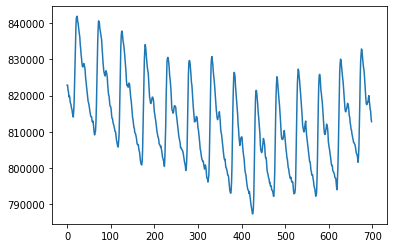

In [12]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:700])
pyplot.show()

# Segment data to N row

In [37]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0,usecols=['850nm','640nm', '940nm', '580nm' ]);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  # overlap gets values from 0 - 1
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*(1 - overlap)
    
  return np.asarray(s) # return a nd array

In [38]:
# The length of signal is 700
d = 700
path = 'drive/My Drive/Dataset/InvertPhaseLong2.csv'
data0 = load_data(path)
ppg0 = segment_data(data0, distance=d, overlap=0)

In [39]:
ppg0.shape

(29, 700, 4)

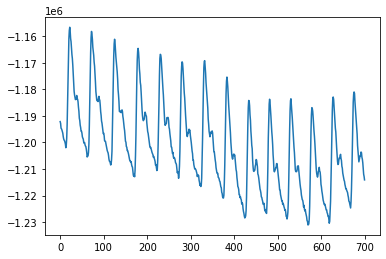

In [41]:
pyplot.plot(ppg0[0][:,3])

## Convert to 2D iamge

In [42]:
ppg850 = ppg0[0][:,0]

In [112]:
from sklearn.preprocessing import MinMaxScaler
# Scaling data to [0,1]
scaler = MinMaxScaler()
ppg850_norm = scaler.fit_transform(ppg850.reshape(-1,1))  
## Generate an arrray to make data image
img0 = np.zeros([len(ppg850),len(ppg850)])

(0.0, 1.0)

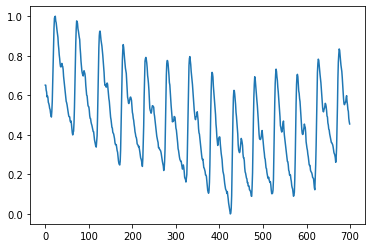

In [115]:
pyplot.plot(ppg850_norm)
np.min(ppg850_norm), np.max(ppg850_norm)

In [119]:
for i in range(0,np.shape(img0)[0]): # row of image
  for j in range(0,np.shape(img0)[1]):
    img0[i,j] = np.floor((ppg850_norm[i] + ppg850_norm[j])*128 )


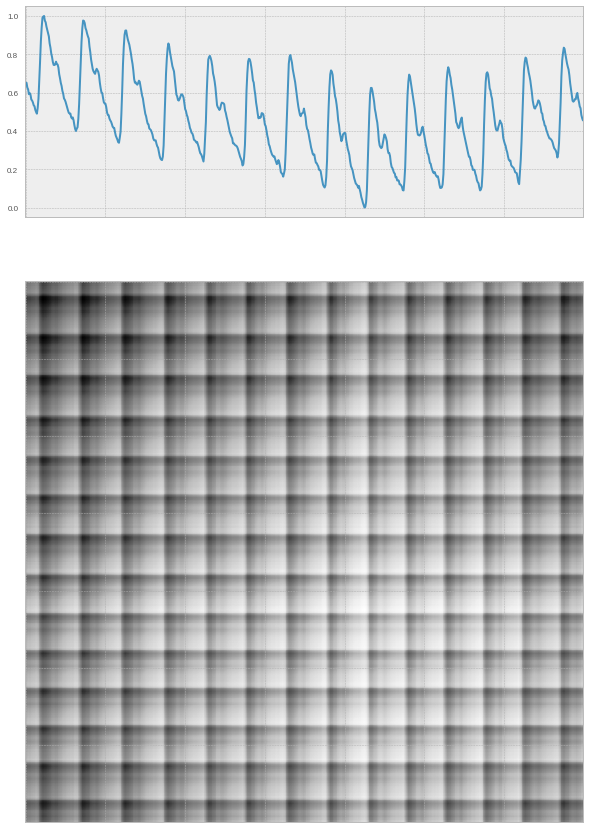

In [182]:
import matplotlib.pyplot as plt

plt.style.use('bmh') #'seaborn-white'

# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

fig = plt.figure(figsize=(10, 15))
grid = plt.GridSpec(15, 10, hspace=0.2, wspace=0.2)

main_ax = fig.add_subplot(grid[5:, 0:],xticklabels=[],yticklabels=[])
ppg1D = fig.add_subplot(grid[0:4, 0:], xticklabels=[], sharex=main_ax)

ppg1D.plot(ppg850_norm.flatten(), markersize=3, alpha=0.9)
main_ax.imshow(img0, interpolation='nearest', aspect='auto')
#ax[0].plot(ppg850_norm.flatten())
#plt.figure()
#plt.imshow(img0, interpolation='None') #interpolation='nearest'
#plt.figure(figsize = (10,10))
# ax[1].imshow(img0, interpolation='nearest', aspect='auto')
# ax[0].label_outer()
# ax[0].yaxis.set_ticklabels([])
# ax[1].label_outer()
# ax[1].yaxis.set_ticklabels([])

### Example to plot Multi-figure different size

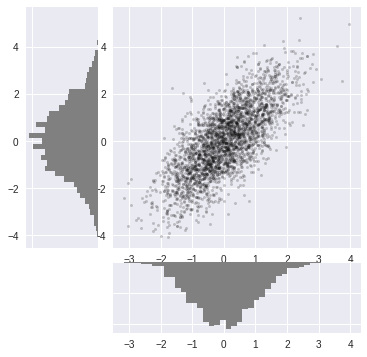

In [159]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [ ]:
ppg850_norm.flatten()

### Convert array to images

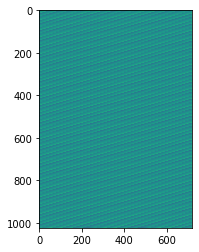

In [88]:
array = np.arange(0, 737280, 1, np.uint8)
array = np.reshape(array, (1024, 720))
img2 = im.fromarray(array)

img2.save('noise_gausse1.png')
plt.figure()
plt.imshow(img2)

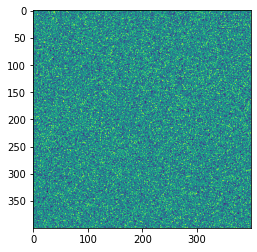

In [83]:
from PIL import Image as im
array = np.random.randint(255, size=(400, 400),dtype=np.uint8)
img = im.fromarray(array)
img.save('noise_gausse.png')
plt.figure()
plt.imshow(img) 